In [5]:
import json
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil
import datetime
import numpy as np
import re
import math
import webcolors

In [6]:
timeslots = [datetime.datetime(2015,11,19,17,0,0), datetime.datetime(2015,11,19,19,0,0), datetime.datetime(2015,11,19,21,0,0), datetime.datetime(2015,11,19,23,0,0), datetime.datetime(2015,11,20,11,0,0),datetime.datetime(2015,11,20,15,0,0), datetime.datetime(2015,11,20,17,0,0), datetime.datetime(2015,11,20,19,0,0)]

In [7]:
col = webcolors.css3_hex_to_names.items()
[str(a[1]) for a in sorted(col,key=lambda x: x[0], reverse=True)]

['white',
 'ivory',
 'lightyellow',
 'yellow',
 'snow',
 'floralwhite',
 'lemonchiffon',
 'cornsilk',
 'seashell',
 'lavenderblush',
 'papayawhip',
 'blanchedalmond',
 'mistyrose',
 'bisque',
 'moccasin',
 'navajowhite',
 'peachpuff',
 'gold',
 'pink',
 'lightpink',
 'orange',
 'lightsalmon',
 'darkorange',
 'coral',
 'hotpink',
 'tomato',
 'orangered',
 'deeppink',
 'magenta',
 'red',
 'oldlace',
 'lightgoldenrodyellow',
 'linen',
 'antiquewhite',
 'salmon',
 'ghostwhite',
 'mintcream',
 'whitesmoke',
 'beige',
 'wheat',
 'sandybrown',
 'azure',
 'honeydew',
 'aliceblue',
 'khaki',
 'lightcoral',
 'palegoldenrod',
 'violet',
 'darksalmon',
 'lavender',
 'lightcyan',
 'burlywood',
 'plum',
 'gainsboro',
 'crimson',
 'palevioletred',
 'goldenrod',
 'orchid',
 'thistle',
 'lightgray',
 'tan',
 'chocolate',
 'peru',
 'indianred',
 'mediumvioletred',
 'silver',
 'darkkhaki',
 'rosybrown',
 'mediumorchid',
 'darkgoldenrod',
 'firebrick',
 'powderblue',
 'lightsteelblue',
 'paleturquoise',
 

In [15]:
colormap = {}
colormap["black"] = "rgb(0,0,0)"
colormap["white"] = "rgb(255,255,255)"
colormap["red"] = "rgb(255,0,0)"
colormap["lime"] = "rgb(0,255,0)"
colormap["blue"] = "rgb(0,0,255)"
colormap["yellow"] = "rgb(255,255,0)"
colormap["cyan"] = "rgb(0,255,255)"
colormap["magenta"] = "rgb(255,0,255)"
colormap["silver"] = "rgb(192,192,192)"
colormap["gray"] = "rgb(128,128,128)"
colormap["maroon"] = "rgb(128,0,0)"
colormap["olive"] = "rgb(128,128,0)"
colormap["green"] = "rgb(0,128,0)"
colormap["purple"] = "rgb(128,0,128)"
colormap["teal"] = "rgb(0,128,128)"
colormap["navy"] = "rgb(0,0,128)"


In [8]:
col = webcolors.css3_hex_to_names.items()
dictCol = 
[str(a[1]) for a in sorted(col,key=lambda x: x[0], reverse=True)]

SyntaxError: invalid syntax (<ipython-input-8-d475affd9bb6>, line 2)

In [9]:
def get_time_id(ts):
    index = 0
    for t in timeslots:
        if ts <= t:
            return index
        index += 1
    return -1

In [10]:
def getrgb(originalRgb):
    rgb = re.split('\(|\,|\)', originalRgb)
    return int(rgb[1]), int(rgb[2]), int(rgb[3])

In [11]:
def getLuminance(originalRgb):
    r, g, b = getrgb(originalRgb)
    return math.sqrt( 0.299*pow(r, 2) + 0.587*pow(g, 2) + 0.114*pow(b, 2) )

In [19]:
import webcolors
import math

def closest_colour(requested_colour):
    color = ""
    closest = -1
    for key in colormap.keys():
        r_c, g_c, b_c = getrgb(colormap[key])
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        dist = math.sqrt(rd+gd+bd)
        if closest == -1 or dist < closest:
            closest = dist
            color = key
    return color

In [20]:
with open('output.json') as data_file:
    data = json.load(data_file)["colors"]

colors = collections.OrderedDict()
valence = collections.OrderedDict()
luminance = collections.OrderedDict()
colorNames = collections.OrderedDict()
for record in data:
    uid = record["uid"]
    ts = dateutil.parser.parse(record["time"])
    t = get_time_id(ts)
    if uid not in colors.keys():
        colors[uid] = collections.OrderedDict()
    if uid not in valence.keys():
        valence[uid] = collections.OrderedDict()
    if uid not in luminance.keys():
        luminance[uid] = collections.OrderedDict()
    if uid not in colorNames.keys():
        colorNames[uid] = collections.OrderedDict()
    r, g, b = getrgb(record["color"])
    colorNames[uid][t] = closest_colour((r, g, b))
    luminance[uid][t] = getLuminance(record["color"])
    colors[uid][t] = record["color"]
    valence[uid][t] = record["valence"]

In [27]:
for cn in colorNames.keys():
    print colorNames[cn]

OrderedDict([(1, 'silver'), (2, 'maroon'), (3, 'magenta'), (5, 'yellow'), (6, 'silver'), (7, 'yellow')])
OrderedDict([(1, 'teal'), (2, 'silver'), (3, 'cyan'), (5, 'magenta'), (6, 'teal'), (7, 'magenta')])
OrderedDict([(1, 'teal'), (2, 'red'), (6, 'silver'), (7, 'lime')])
OrderedDict([(1, 'yellow'), (2, 'red'), (3, 'maroon'), (6, 'purple'), (7, 'yellow')])
OrderedDict([(1, 'silver'), (2, 'olive'), (5, 'white'), (6, 'purple'), (7, 'white')])
OrderedDict([(1, 'red'), (2, 'silver'), (3, 'maroon'), (5, 'yellow'), (6, 'white'), (7, 'yellow')])
OrderedDict([(1, 'blue'), (2, 'red'), (5, 'lime'), (6, 'olive'), (7, 'white')])
OrderedDict([(1, 'magenta'), (3, 'olive'), (6, 'red'), (7, 'red')])
OrderedDict([(1, 'magenta'), (2, 'yellow'), (3, 'yellow'), (4, 'gray'), (5, 'cyan'), (6, 'silver'), (7, 'red')])
OrderedDict([(1, 'navy'), (2, 'navy'), (3, 'teal'), (5, 'red'), (6, 'gray'), (7, 'purple')])
OrderedDict([(1, 'olive'), (2, 'maroon'), (4, 'black'), (6, 'white'), (7, 'silver')])
OrderedDict([(1,

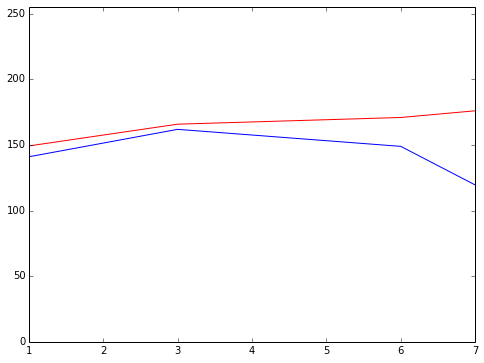

In [62]:
uid = 8

x = valence[uid].keys()
y1 = [(i+100)*(255/float(200)) for i in valence[uid].values()]
y2 = luminance[uid].values()

plt.ylim ([0,255])
plt.plot(x, y1,'r')
plt.plot(x, y2,'b')
plt.show()

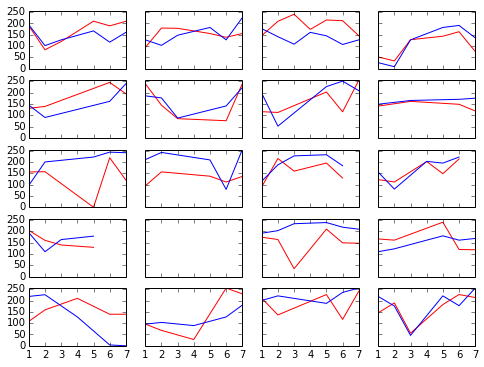

In [87]:
# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f, axarr = plt.subplots(5,4, sharex='col', sharey='row')

for uid in range(1, 21):
    if uid == 14:
        continue
    lum = luminance[uid]
    val = valence[uid]
    x = lum.keys()
    y1 = lum.values()
    y2 = [(i+100)*(255/float(200)) for i in val.values()]
    axarr[(uid-1)/4][(uid-1)%4].set_ylim([0,255])
    axarr[(uid-1)/4][(uid-1)%4].set_xlim([1,7])
    axarr[(uid-1)/4][(uid-1)%4].plot(x, y1, 'r')
    axarr[(uid-1)/4][(uid-1)%4].plot(x, y2, 'b')
    
plt.show()

In [112]:
from scipy.stats import pearsonr

pearson = 0
for uid in range(1, 21):
    if uid == 14:
        continue
    val = valence[uid].values()
    lum = luminance[uid].values()
    
#     print uid, pearsonr(val, lum)[0]
    pearson += pearsonr(val, lum)[0]
    
av_pearson = (pearson / 19)
av_pearson

0.31515584521823969

In [108]:
uid = 4

val = valence[uid].values()
lum = luminance[uid].values()

print np.corrcoef([val, lum])
print pearsonr(val, lum)[0]

[[ 1.         0.9220229]
 [ 0.9220229  1.       ]]
0.922022904774
